### Preparing the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Size of the house (in 1000 ft^2)
x = np.array([1.0, 5.0])
# Price of the house (in 1000 dollars)
y = np.array([300.0, 800.0])

### Plotting the dataset

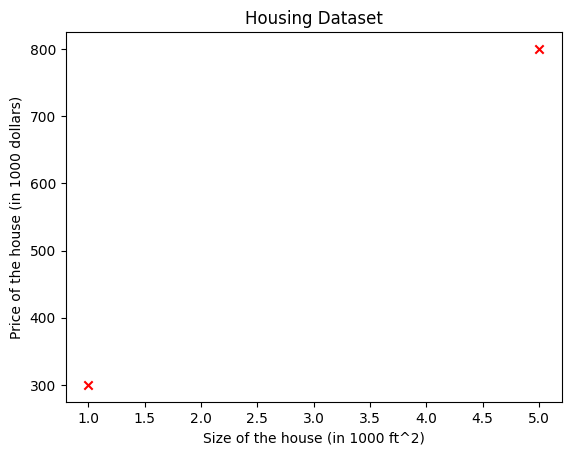

In [3]:
def plot_data_scatter(x_axis, y_axis, x_label="X axis", y_label="Y axis", title="Title"):
    plt.scatter(x_axis, y_axis, c='r', marker='x')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    #plt.show()

plot_data_scatter(x, y, "Size of the house (in 1000 ft^2)", "Price of the house (in 1000 dollars)", "Housing Dataset")

### Defining Hypothesis function

In [4]:
# Defining the hypothesis function (univariate linear regression)
def uni_linear_reg(x, w, b):
    # Size of the dataset
    m = x.shape[0]
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = w * x[i] + b
    return f_wb

### Plotting the Hypothesis function

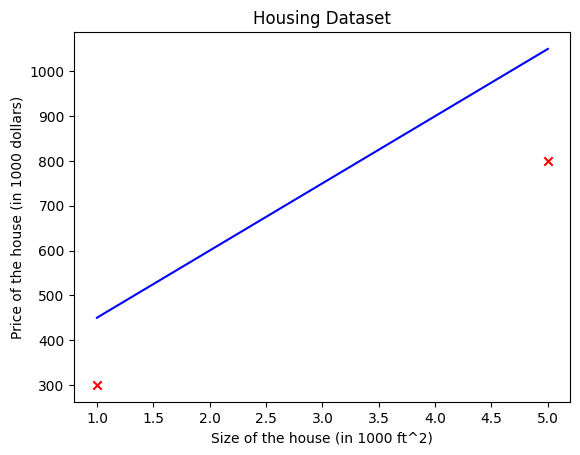

In [5]:
# Plotting the function
def plot_hypothesis_func(x, y, hypothesis, w, b, x_label="X axis", y_label="Y axis", title="Title"):
    y_pred = hypothesis(x, w, b)
    plt.plot(x, y_pred, c='b')
    plot_data_scatter(x, y, x_label, y_label, title)
    plt.show()

plot_hypothesis_func(x, y, uni_linear_reg, 150, 300,  "Size of the house (in 1000 ft^2)", "Price of the house (in 1000 dollars)", "Housing Dataset")

### Running Manual Gradient Descent

In [54]:
from IPython.display import clear_output
def manual_grad_desc(x, y, hypothesis, x_label="X axis", y_label="Y axis", title="Title"):
    count = 0
    CONTINUE = True
    while CONTINUE:
        clear_output()
        if count != 0:
            print("Your task is to try your best to fit the 'blue' line with the 'red' spots")
            print(f"Previous weight (w): {w}")
            print(f"Previous bias (b): {b}")
        w = int(input("Enter value of weight (w): "))
        b = int(input("Enter value of bias (b): "))
        plot_hypothesis_func(x, y, hypothesis, w, b, x_label, y_label, title)
        print("Try more values of w and b? (y/n)")
        response = input()
        if response == 'n' or response == 'N':
            CONTINUE = False
        else:
            count += 1

In [55]:
manual_grad_desc(x, y, uni_linear_reg, "Size of the house (in 1000 ft^2)", "Price of the house (in 1000 dollars)", "Housing Dataset")

KeyboardInterrupt: Interrupted by user

### Computing Cost

In [6]:
# Compute cost as Mean Square Error (MSE)
def compute_cost(x, y, w, b):
    m = x.shape[0]
    cost = 0
    for i in range(m):
        f_wb = w * x[i] + b
        sq_err = (f_wb - y[i]) ** 2
        cost += sq_err
    total_cost = 1 / (2 * m) * cost
    return total_cost

### Visualizing Cost

In [7]:
# To visualise the cost function lets take some sample values for (w, b) and then compute cost for each pair
def visualize_cost(x, y, cost_function):
    w = np.array([100, 150, 200])
    b = np.array([200, 150, 100])
    m = w.shape[0]
    costs = []
    for i in range(m):
        costs.append(cost_function(x, y, w[i], b[i]))

    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.scatter(w, b, costs)
    ax.set_xlabel('Weight (w)')
    ax.set_ylabel('Bias (b)')
    ax.set_zlabel('Cost (J)')
    plt.show()

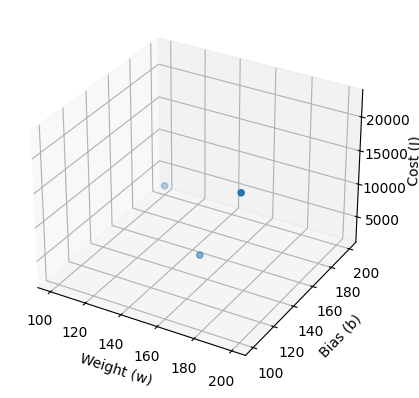

In [8]:
visualize_cost(x, y, compute_cost)

### Calculating Gradient / Scope

In [9]:
# Function to calculate gradient
def calc_grad(x, y, w, b):
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0
    for i in range(m):
        f_wb = w * x[i] + b
        dj_dw_i = (f_wb - y[i]) * x[i]
        dj_db_i = (f_wb - y[i])
        dj_dw += dj_dw_i
        dj_db += dj_db_i
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    return dj_dw, dj_db

In [10]:
# Function that implements gradient descent algorithm
def gradient_descent(x, y, w, b, num_iters, alpha, cost_function, gradient_function):
    cost_record = []
    w_record = []
    b_record = []
    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(x, y, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        if i % 1000 == 0:
            cost = cost_function(x, y, w, b)
            print(f"Iteration: {i:4}", f"Cost: {cost:0.2e}", f"w: {w:0.3e}", f"b: {b:0.5e}")
            cost_record.append(cost)
            w_record.append(w)
            b_record.append(b)
    return w, b, cost_record

In [12]:
# Making dummy dataset

# Initializing the parameters
w_init = 0
b_init = 0
num_iters = 10000
alpha = 1.0e-2
w, b, cost_record = gradient_descent(x, y, w_init, b_init, num_iters, alpha, compute_cost, calc_grad)
print(f"Final value of w: {w}")
print(f"Final value of b: {b}")

Iteration:    0 Cost: 1.37e+05 w: 2.150e+01 b: 5.50000e+00
Iteration: 1000 Cost: 8.42e+00 w: 1.267e+02 b: 1.67605e+02
Iteration: 2000 Cost: 2.44e-02 w: 1.251e+02 b: 1.74602e+02
Iteration: 3000 Cost: 7.06e-05 w: 1.250e+02 b: 1.74979e+02
Iteration: 4000 Cost: 2.05e-07 w: 1.250e+02 b: 1.74999e+02
Iteration: 5000 Cost: 5.92e-10 w: 1.250e+02 b: 1.75000e+02
Iteration: 6000 Cost: 1.72e-12 w: 1.250e+02 b: 1.75000e+02
Iteration: 7000 Cost: 4.97e-15 w: 1.250e+02 b: 1.75000e+02
Iteration: 8000 Cost: 1.44e-17 w: 1.250e+02 b: 1.75000e+02
Iteration: 9000 Cost: 4.17e-20 w: 1.250e+02 b: 1.75000e+02
Final value of w: 125.00000000000672
Final value of b: 174.99999999997158


In [ ]:
manual_grad_desc(x, y, uni_linear_reg, "Size of the house (in 1000 ft^2)", "Price of the house (in 1000 dollars)", "Housing Dataset")

### Working with a sample dataset

In [36]:
data = pd.read_csv("../house_price_prediction.csv")

In [37]:
data.head()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056


In [42]:
X = data["Area"].to_numpy()
Y = data["Price"].to_numpy()

In [39]:
def convert_to_float(A):
    for i in range(A.shape[0]):
        A[i] = float(A[i])
    return A

In [40]:
def rescale_feature(A):
    for i in range(A.shape[0]):
        A[i] = A[i] / 1000
    return A

In [41]:
print(convert_to_float(X))
print(type(convert_to_float(X)))
print(rescale_feature(X))

[1360 4272 3592 ... 1062 4062 2989]
<class 'numpy.ndarray'>
[1 4 3 ... 1 4 2]


In [43]:
# Initialize parameters
w_init = 0
b_init = 0
num_iters = 20000
alpha = 1.0e-5
w, b, cost_record = gradient_descent(rescale_feature(X), convert_to_float(Y), w_init, b_init, num_iters, alpha, compute_cost, calc_grad)
print(f"Final value of w: {w}")
print(f"Final value of b: {b}")

Iteration:    0 Cost: 1.83e+11 w: 0.000e+00 b: 5.37677e+00
Iteration: 1000 Cost: 1.80e+11 w: 0.000e+00 b: 5.35532e+03
Iteration: 2000 Cost: 1.77e+11 w: 0.000e+00 b: 1.06520e+04
Iteration: 3000 Cost: 1.74e+11 w: 0.000e+00 b: 1.58960e+04
Iteration: 4000 Cost: 1.72e+11 w: 0.000e+00 b: 2.10879e+04
Iteration: 5000 Cost: 1.69e+11 w: 0.000e+00 b: 2.62281e+04
Iteration: 6000 Cost: 1.66e+11 w: 0.000e+00 b: 3.13171e+04
Iteration: 7000 Cost: 1.64e+11 w: 0.000e+00 b: 3.63555e+04
Iteration: 8000 Cost: 1.61e+11 w: 0.000e+00 b: 4.13437e+04
Iteration: 9000 Cost: 1.59e+11 w: 0.000e+00 b: 4.62823e+04
Iteration: 10000 Cost: 1.57e+11 w: 0.000e+00 b: 5.11718e+04
Iteration: 11000 Cost: 1.54e+11 w: 0.000e+00 b: 5.60127e+04
Iteration: 12000 Cost: 1.52e+11 w: 0.000e+00 b: 6.08053e+04
Iteration: 13000 Cost: 1.50e+11 w: 0.000e+00 b: 6.55503e+04
Iteration: 14000 Cost: 1.47e+11 w: 0.000e+00 b: 7.02481e+04
Iteration: 15000 Cost: 1.45e+11 w: 0.000e+00 b: 7.48991e+04
Iteration: 16000 Cost: 1.43e+11 w: 0.000e+00 b: 7.

In [29]:
x

array([1., 5.])

(0.0, 10000.0)

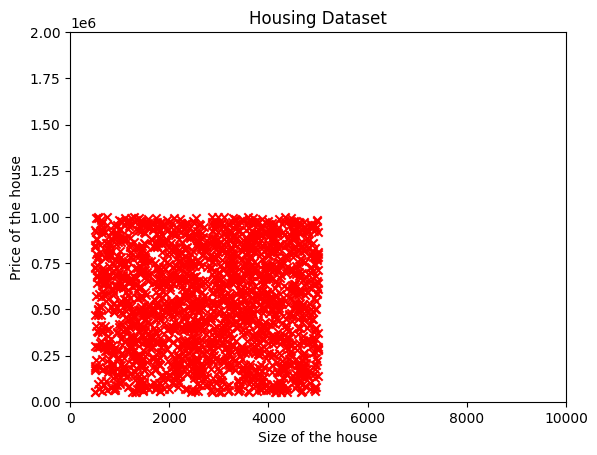

In [41]:
plot_data_scatter(X, Y, "Size of the house", "Price of the house", "Housing Dataset")
plt.ylim(0, 2e6)
plt.xlim(0, 10000)

In [53]:
manual_grad_desc(X, Y, uni_linear_reg, "Size of the house (in 1000 ft^2)", "Price of the house (in 1000 dollars)", "Housing Dataset")

KeyboardInterrupt: Interrupted by user

In [ ]:
# to perform feature engineering and then try running gradient descent